In [104]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import os 
import pandas as pd 

In [105]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [106]:
picture_size=128
folder_path='/kaggle/input/brain-dead-emotion-detection/brain_dead_emotion_detection'

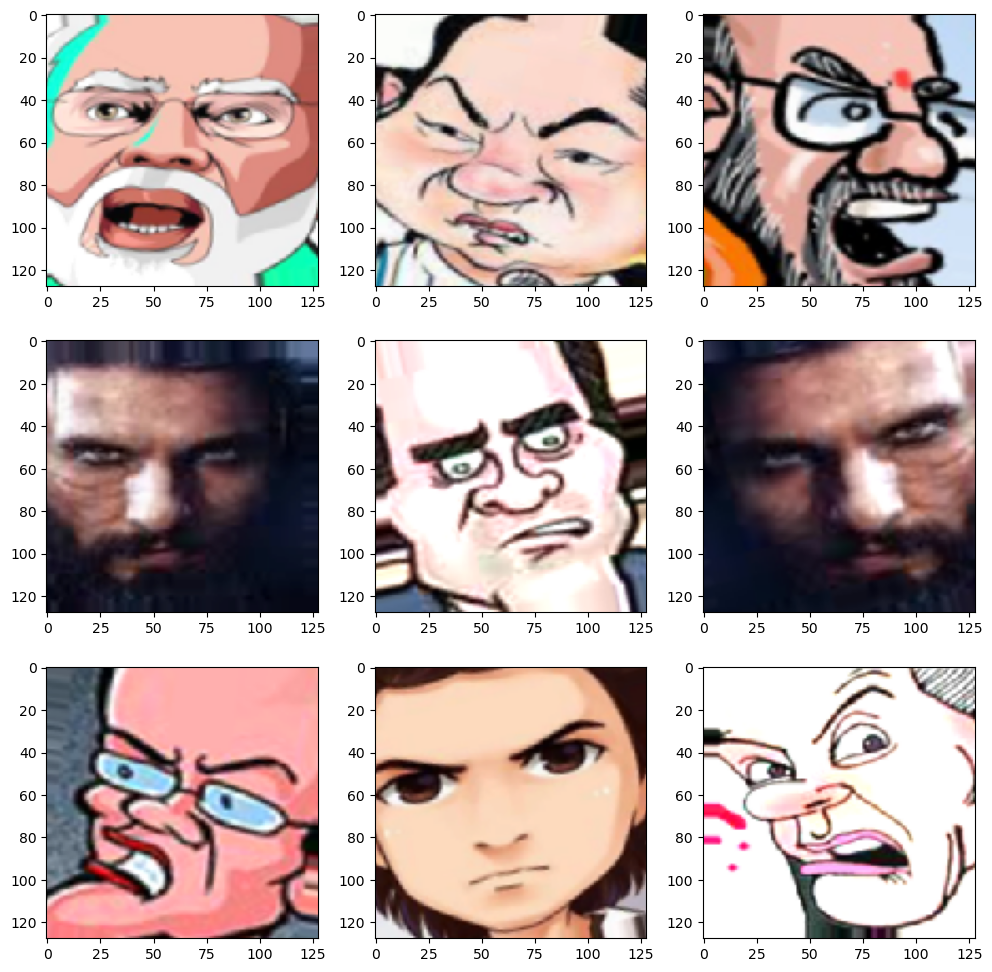

In [107]:
expression = 'angry'
plt.figure(figsize=(12,12))
for i in range (1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/Train/"+expression+"/"+os.listdir(folder_path+"/Train/"+expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [108]:
batch_size = 128 #no of training example to take in one time 
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/Train",
                                             target_size = (picture_size,picture_size),
                                             color_mode = "grayscale",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"/Test",
                                             target_size = (picture_size,picture_size),
                                             color_mode = "grayscale",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)

Found 1810 images belonging to 4 classes.
Found 369 images belonging to 4 classes.


In [109]:
no_of_classes = 4
model = Sequential()

#1st CNN layer 
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.30))

#2nd CNN layer 
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.30))

#3rd CNN layer 
model.add(Conv2D(512,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.30))

#4th CNN layer 
model.add(Conv2D(512,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.30))

model.add(Flatten())

#fully connected 1st layer 
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

#fully connected 2nd layer 
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_120 (Ba  (None, 128, 128, 64)     256       
 tchNormalization)                                               
                                                                 
 activation_120 (Activation)  (None, 128, 128, 64)     0         
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_120 (Dropout)       (None, 64, 64, 64)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 64, 64, 128)     

In [110]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/kaggle/working/model.h5",monitor='val_acc', verbose=1,save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=1,
                              restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                       factor = 0.1,
                                       patience =10,
                                       verbose=1,
                                       min_delta=0.0001)
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
epochs = 48

In [111]:
history = model.fit_generator(generator=train_set,
                             steps_per_epoch=train_set.n//train_set.batch_size,
                             epochs=epochs,
                             validation_data = test_set,
                             validation_steps = test_set.n//test_set.batch_size,
                             callbacks=callbacks_list)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/48


2023-03-23 19:34:33.203193: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_20/dropout_120/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


14/14 [==============================] - 8s 446ms/step - loss: 1.5940 - accuracy: 0.3157 - val_loss: 3.1311 - val_accuracy: 0.0859 - lr: 1.0000e-04
Epoch 2/48
14/14 [==============================] - 5s 363ms/step - loss: 1.3211 - accuracy: 0.4453 - val_loss: 2.5626 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 3/48
14/14 [==============================] - 5s 400ms/step - loss: 1.2001 - accuracy: 0.4881 - val_loss: 2.3001 - val_accuracy: 0.1172 - lr: 1.0000e-04
Epoch 4/48
14/14 [==============================] - 5s 382ms/step - loss: 1.1232 - accuracy: 0.5214 - val_loss: 1.6094 - val_accuracy: 0.2969 - lr: 1.0000e-04
Epoch 5/48
14/14 [==============================] - 5s 376ms/step - loss: 1.0444 - accuracy: 0.5690 - val_loss: 1.2400 - val_accuracy: 0.4023 - lr: 1.0000e-04
Epoch 6/48
14/14 [==============================] - 6s 402ms/step - loss: 1.0027 - accuracy: 0.5999 - val_loss: 1.2755 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 7/48
14/14 [==============================] - 5s 35

In [128]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
model_path = "model.tflite"
# Save the model.
with open(model_path, "wb") as f:
    f.write(tflite_model)

In [129]:
model.save("emotion_detector.model", save_format="h5")

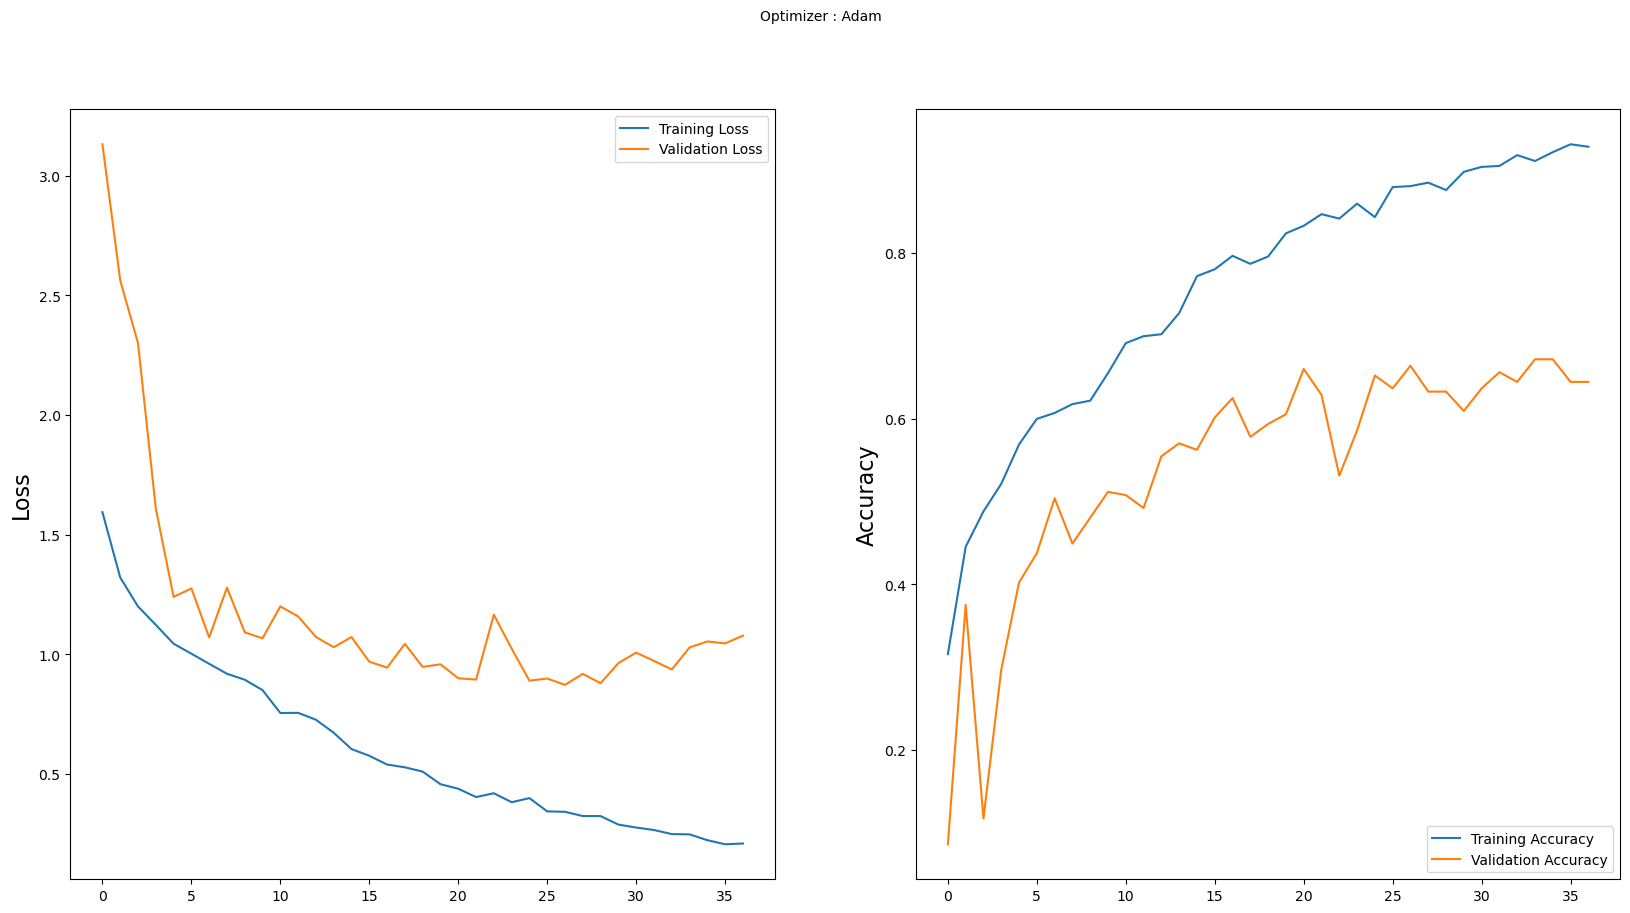

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [89]:
y_acc=(test_set.classes)
class1 = model.predict(test_set)
y_pred=[]
# print(output_data)
for lol in class1:
    # print(max(lol))
    # print(min(lol))
    i=0
    a=0
    r=-1
    for x in lol:
        if x>a:
            a=x
            r=i
        i=i+1
    y_pred.append(r)

3/3 [==============================] - 2s 612ms/step


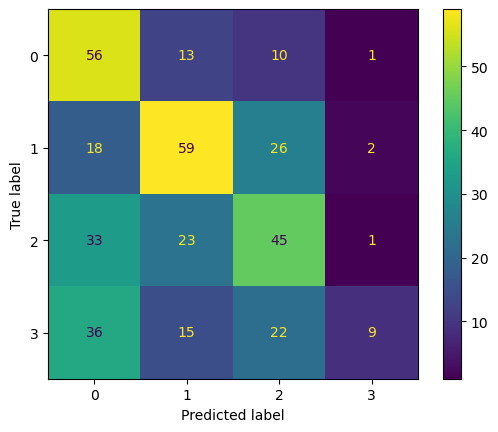

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# y_pred = model.predict(val_ds)
cm = confusion_matrix(y_acc, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [117]:
for i in range (0,4):
    for j in range (0,4):
        print(cm[i][j])

56
13
10
1
18
59
26
2
33
23
45
1
36
15
22
9


In [118]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_acc, y_pred, pos_label=None)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()